In [11]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import scipy.stats as st

In [12]:
def join_as_complex(array):
    rows = []
    for i in range(0, len(array)):
        if i % 2 == 1:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(abs(complex_number))
    return rows

In [13]:
root = 'third-scan/parsed/'
empty_scans = []
buried_scans = []
for file in os.listdir(root):
    if '.npy' not in file:
        continue
    if 'Aug-13-2021' in file:
        continue
    scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    for elem in join_as_complex(scan[1:]):
        if 'Sand' in file:
            empty_scans.append(elem)
        else:
            buried_scans.append(elem)

In [14]:
august_13 = []
for file in os.listdir(root):
    if '.npy' not in file:
        continue
    if 'Aug-13-2021' in file:
        scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
        for elem in join_as_complex(scan[1:]):
            august_13.append(elem)

In [15]:
print(len(empty_scans[0]))
print(len(buried_scans))

1000
5200


In [16]:
sand = empty_scans
buried = buried_scans
print(len(sand))
print(len(buried))

6000
5200


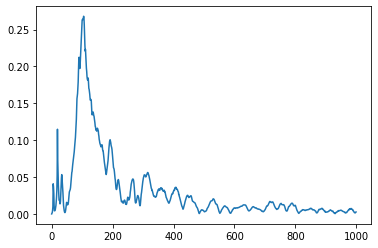

In [43]:
plt.plot(sand[0])

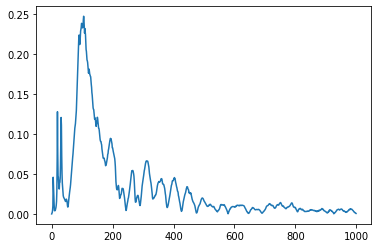

In [44]:
plt.plot(buried[0])

In [21]:
X = np.concatenate((sand, buried))
Y = [0] * len(sand) + [1] * (len(buried))

In [22]:
model = LogisticRegression(solver='liblinear', penalty='l1', C=100, random_state=42).fit(X, Y)

In [23]:
model = LogisticRegression(solver='liblinear', penalty='l1', C=183.9, max_iter=201, random_state=42).fit(X, Y)

In [24]:
model.score(X, Y)

1.0

In [45]:
X.shape

(11200, 1000)

In [27]:
model.score(august_13, [1] * (len(august_13)))

1.0

In [34]:
model.predict(august_13)

array([1, 1, 1, ..., 1, 1, 1])

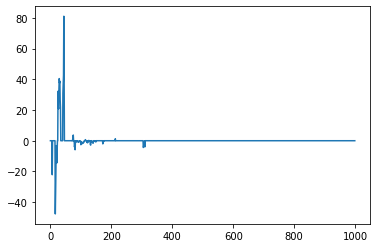

In [35]:
plt.plot(model.coef_[0])

In [36]:
import pickle

In [37]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)